In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Importing Neccesary Libraries and Datasets**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.preprocessing import LabelEncoder

In [3]:
df=pd.read_csv("/content/drive/MyDrive/Datasets/loan.csv")
df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved


NameError: name '_df_13' is not defined

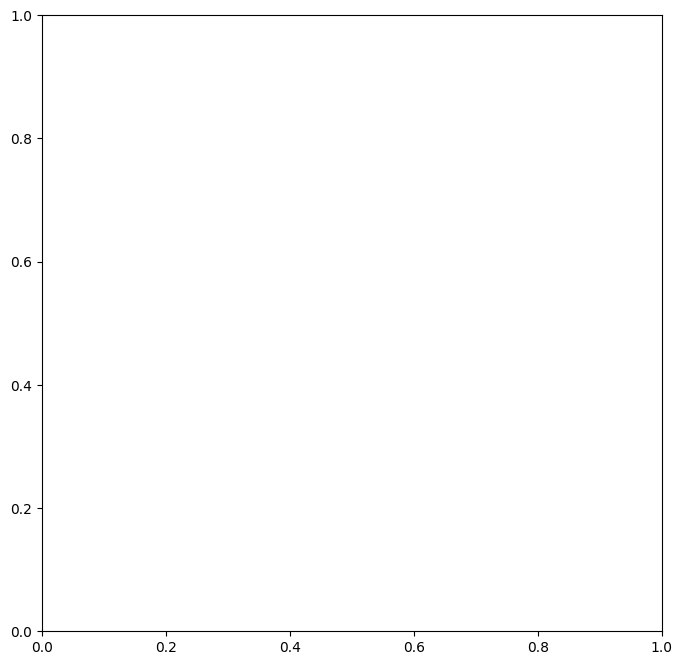

In [4]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['education_level'].value_counts()
    for x_label, grp in _df_13.groupby('occupation')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('occupation')
_ = plt.ylabel('education_level')

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(11,6))
df.groupby('occupation').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

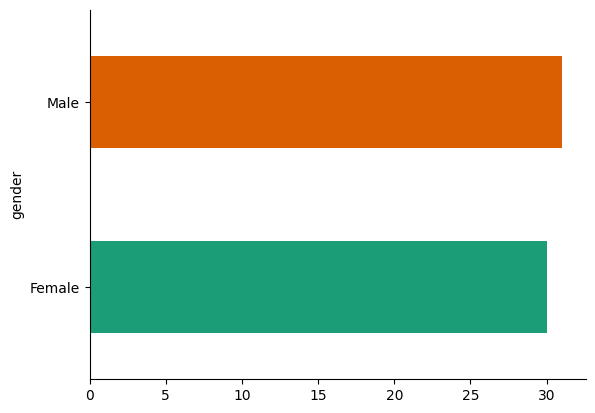

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

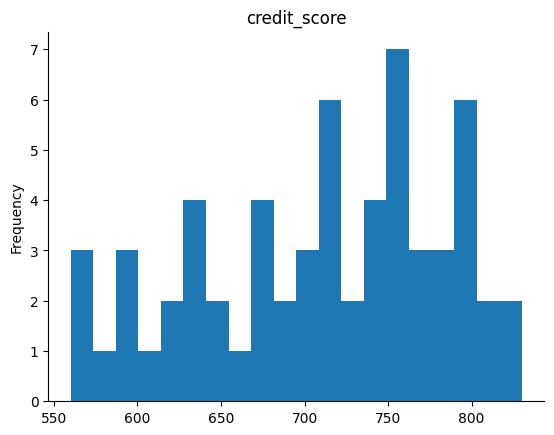

In [6]:
from matplotlib import pyplot as plt
df['credit_score'].plot(kind='hist', bins=20, title='credit_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

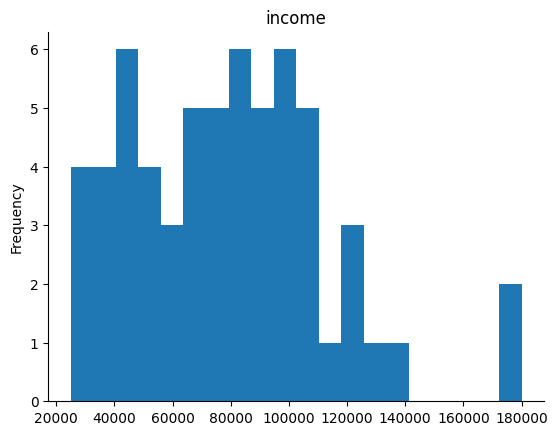

In [7]:
from matplotlib import pyplot as plt
df['income'].plot(kind='hist', bins=20, title='income')
plt.gca().spines[['top', 'right',]].set_visible(False)

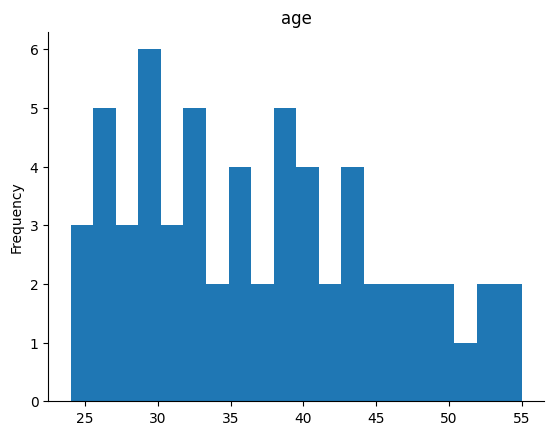

In [8]:
from matplotlib import pyplot as plt
df['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: >

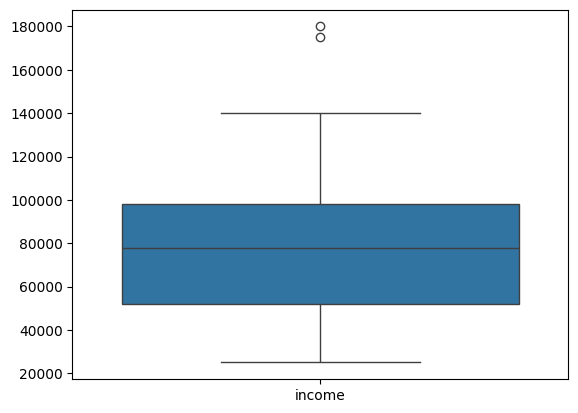

In [9]:
sns.boxplot(data=df.iloc[:,5:6])

**This BoxPlot represents multiple parameters for each variables ( minimum value,maximum value, quartiles) but it also has too many outliers (outliers are something which lies outside the range and can affect analysis)**

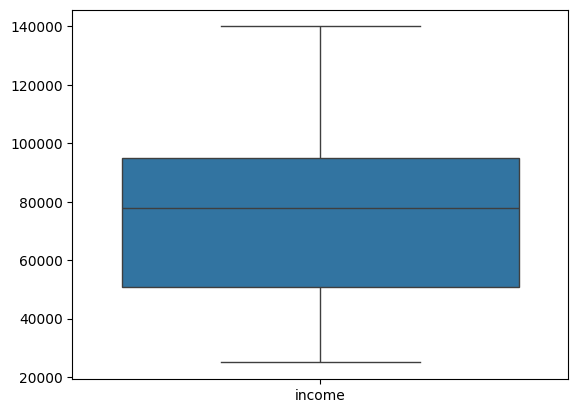

In [10]:
for column in df.iloc[:,5:6].columns:
  q1=df[column].quantile(0.25)
  q3=df[column].quantile(0.75)
  iqr=q3-q1
  ub=q3+1.5*iqr
  lb=q1-1.5*iqr
  df=df[(df[column] > lb) & (df[column] < ub)]
  sns.boxplot(data=df.iloc[:,5:6])


**Most of the outliers are removed using inter quartile range**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59 entries, 0 to 60
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              59 non-null     int64 
 1   gender           59 non-null     object
 2   occupation       59 non-null     object
 3   education_level  59 non-null     object
 4   marital_status   59 non-null     object
 5   income           59 non-null     int64 
 6   credit_score     59 non-null     int64 
 7   loan_status      59 non-null     object
dtypes: int64(3), object(5)
memory usage: 4.1+ KB


In [12]:
df.isna().sum()

age                0
gender             0
occupation         0
education_level    0
marital_status     0
income             0
credit_score       0
loan_status        0
dtype: int64

In [13]:
df.dropna()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved
5,24,Female,Nurse,Associate's,Single,48000,640,Denied
6,42,Male,Lawyer,Doctoral,Married,120000,790,Approved
7,29,Female,Artist,Bachelor's,Single,38000,620,Denied
8,37,Male,IT,Master's,Married,92000,750,Approved
10,55,Male,Consultant,Master's,Married,110000,770,Approved


In [14]:
df.describe()

,age,income,credit_score
count,59.000000,59.000000,59.000000
mean,36.711864,75644.067797,705.932203
std,8.317101,28872.945642,70.640387
min,24.000000,25000.000000,560.000000
25%,30.000000,51000.000000,650.000000
50%,36.000000,78000.000000,720.000000
75%,42.500000,95000.000000,760.000000
max,55.000000,140000.000000,810.000000


In [15]:
df.dtypes

age                 int64
gender             object
occupation         object
education_level    object
marital_status     object
income              int64
credit_score        int64
loan_status        object
dtype: object

In [16]:
label_encoder={}
for column in df.columns[1:5]:
    label_encoder[column]=LabelEncoder()
    df[column]=label_encoder[column].fit_transform(df[column])

In [17]:
label_encoder["loan_status"]=LabelEncoder()
df["loan_status"]=label_encoder["loan_status"].fit_transform(df["loan_status"])
df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,1,11,1,0,85000,720,0
1,45,0,34,4,1,62000,680,0
2,28,1,32,3,1,25000,590,1
3,51,0,15,1,0,105000,780,0
4,36,1,0,1,0,75000,710,0


# Feature Scaling

In [18]:
data_scaling=df.iloc[:,5:7]
cols=data_scaling.columns
cols
features=data_scaling

In [19]:
scaler=StandardScaler().fit(features)
features=scaler.transform(features)
features=pd.DataFrame(features,columns=cols)
features

,income,credit_score
0,0.326820,0.200856
1,-0.476612,-0.370253
2,-1.769088,-1.655248
3,1.025455,1.057519
4,-0.022498,0.058079
5,-0.965657,-0.941362
6,1.549432,1.200297
7,-1.314975,-1.226916
8,0.571342,0.629188
9,1.200114,0.914742


In [20]:
new_credit_score=pd.Series(features["credit_score"].values,index=df["credit_score"]).to_dict()
df["credit_score"]=df["credit_score"].map(new_credit_score)
df

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,1,11,1,0,85000,0.200856,0
1,45,0,34,4,1,62000,-0.370253,0
2,28,1,32,3,1,25000,-1.655248,1
3,51,0,15,1,0,105000,1.057519,0
4,36,1,0,1,0,75000,0.058079,0
5,24,0,18,0,1,48000,-0.941362,1
6,42,1,14,2,0,120000,1.200297,0
7,29,0,3,1,1,38000,-1.226916,1
8,37,1,13,4,0,92000,0.629188,0
10,55,1,6,4,0,110000,0.914742,0


In [21]:
new_income=pd.Series(features["income"].values,index=df["income"]).to_dict()
df["income"]=df["income"].map(new_income)
df

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,1,11,1,0,0.326820,0.200856,0
1,45,0,34,4,1,-0.476612,-0.370253,0
2,28,1,32,3,1,-1.769088,-1.655248,1
3,51,0,15,1,0,1.025455,1.057519,0
4,36,1,0,1,0,-0.022498,0.058079,0
5,24,0,18,0,1,-0.965657,-0.941362,1
6,42,1,14,2,0,1.549432,1.200297,0
7,29,0,3,1,1,-1.314975,-1.226916,1
8,37,1,13,4,0,0.571342,0.629188,0
10,55,1,6,4,0,1.200114,0.914742,0


# Naive Bayes classification

In [22]:
x=df.iloc[:,1:7]
y=df.iloc[:,7]
nbmodel=GaussianNB()
x.shape

(59, 6)

Train Test split

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [24]:
nbmodel.fit(x_train,y_train)
y_pred=nbmodel.predict(x_test)

# Evaluation Metrics

In [25]:
accuracy_score(y_pred,y_test)


0.8888888888888888

<Axes: >

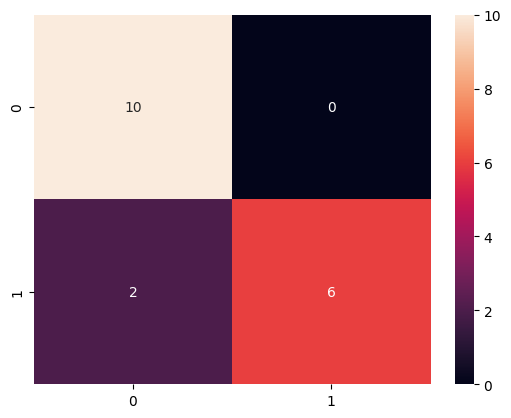

In [26]:
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True)

In [27]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.75      0.86         8

    accuracy                           0.89        18
   macro avg       0.92      0.88      0.88        18
weighted avg       0.91      0.89      0.89        18



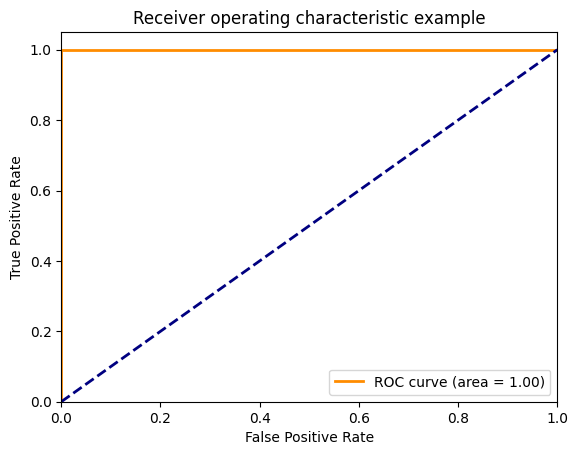

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
ptest = nbmodel.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, ptest)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


#Interpretation
**The closer the ROC curve is to the upper left corner, the better the model is at distinguishing between classes.**

**A model with an AUC of 1.0 is a perfect classifier, while a model with an AUC of 0.5 is no better than random guessing.**

**In this case, the AUC of 1.00 indicates that the model is good at distinguishing between loan applicants who will and will not default on their loans.**


In [32]:
# prompt: generate a pca plot with interpretation

import pandas as pd
from sklearn.decomposition import PCA
import plotly.express as px

# Create a PCA instance
pca = PCA(n_components=2)

# Fit the PCA instance to the scaled features
pca.fit(features)

# Transform the scaled features using the fitted PCA instance
pca_data = pca.transform(features)

# Create a DataFrame with the principal components and labels
pca_df = pd.DataFrame({
    "pca_1": pca_data[:, 0],
    "pca_2": pca_data[:, 1],
    "label": df["loan_status"]
})

# Create a plotly express scatter plot
fig = px.scatter(pca_df, x="pca_1", y="pca_2", color="label")

# Update the plot layout
fig.update_layout(
    title="PCA Plot",
    xaxis_title="PC1",
    yaxis_title="PC2"
)

# Show the plot
fig.show()



**Interpretation:**

**The PCA plot shows the distribution of data points in the first two principal components.**

Each point represents a loan applicant, and the color indicates the loan status (approved or not approved).

**The plot can be used to identify patterns and clusters in the data, and to visualize the relationship between the different variables**.

For example, we can see that there is a clear separation between the approved and not approved loans in the first principal component.

This suggests that there is a strong correlation between the first principal component and the loan status.

We can also see that there is some overlap between the two groups in the second principal component.

This suggests that there is some variability in the second principal component that is not related to the loan status.

In [33]:
df=pd.read_csv("/content/drive/MyDrive/Datasets/Crop_Recommendation.csv")
df.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


# EDA

<Axes: xlabel='Rainfall', ylabel='Count'>

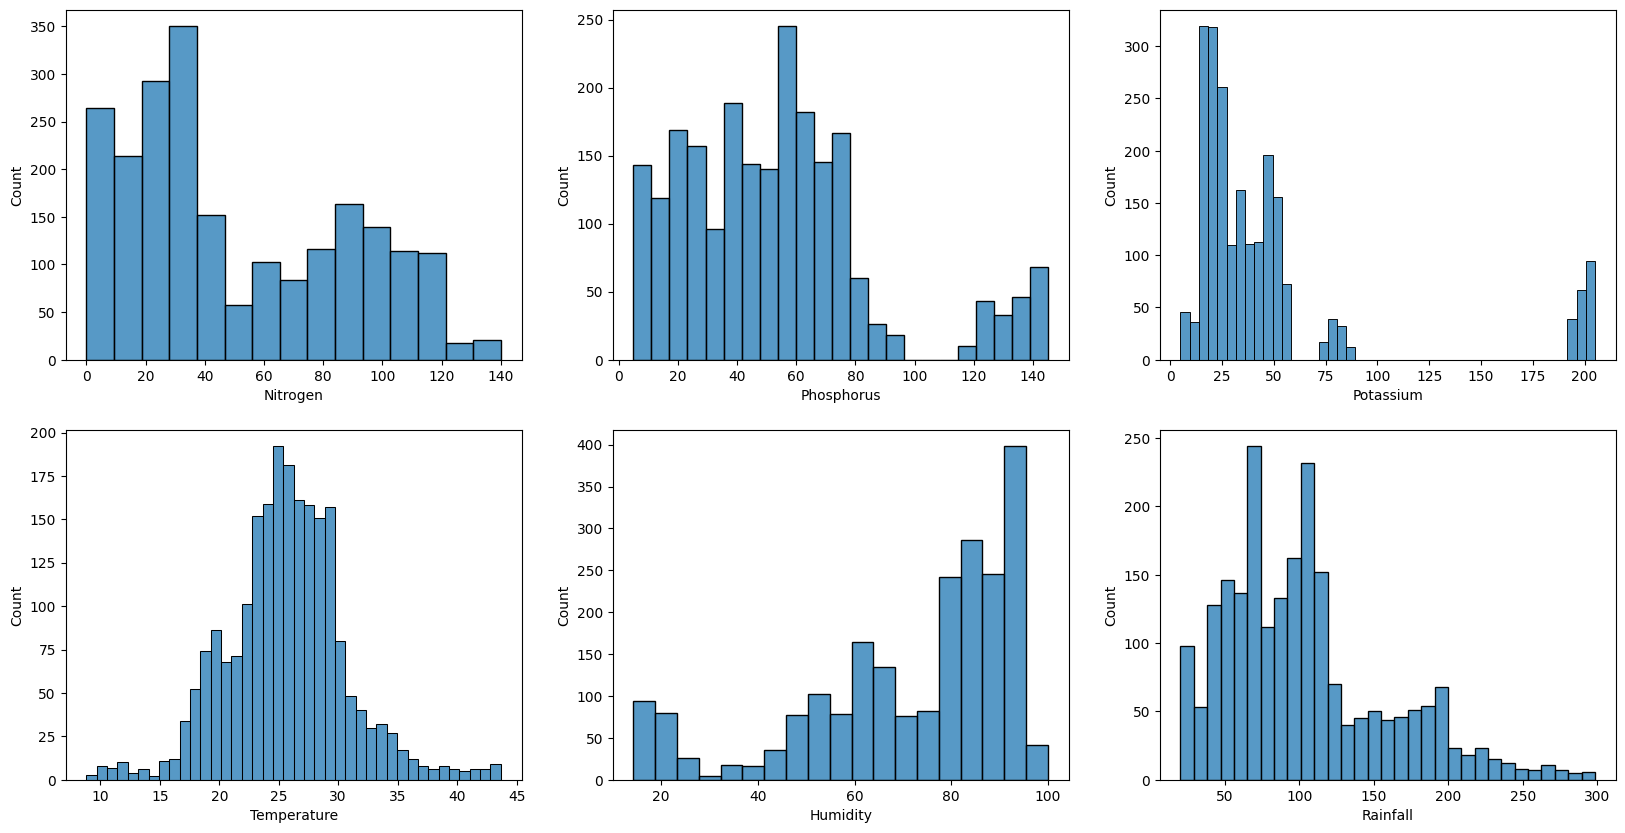

In [34]:
import matplotlib.pyplot as plt
fig,axes=plt.subplots(2,3,figsize=(20,10))
sns.histplot(df["Nitrogen"],ax=axes[0,0])
sns.histplot(df["Phosphorus"],ax=axes[0,1])
sns.histplot(df["Potassium"],ax=axes[0,2])
sns.histplot(df["Temperature"],ax=axes[1,0])
sns.histplot(df["Humidity"],ax=axes[1,1])
sns.histplot(df["Rainfall"],ax=axes[1,2])

<Axes: >

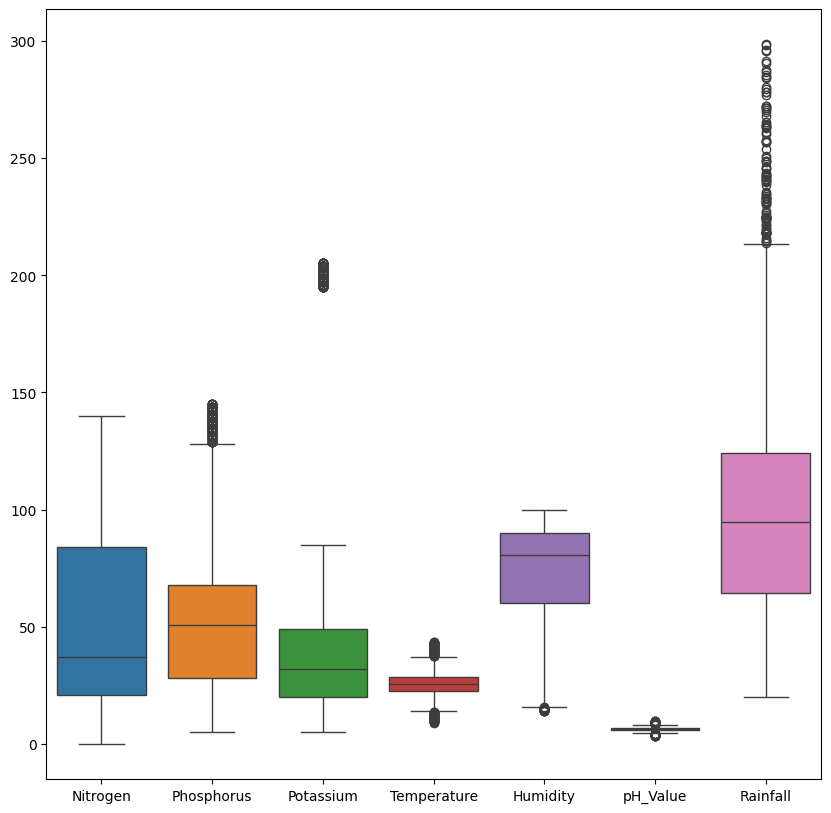

In [35]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df.iloc[:,0:7])

**This BoxPlot represents multiple parameters for each variables ( minimum value,maximum value, quartiles) but it also has too many outliers (outliers are something which lies outside the range and can affect analysis)**

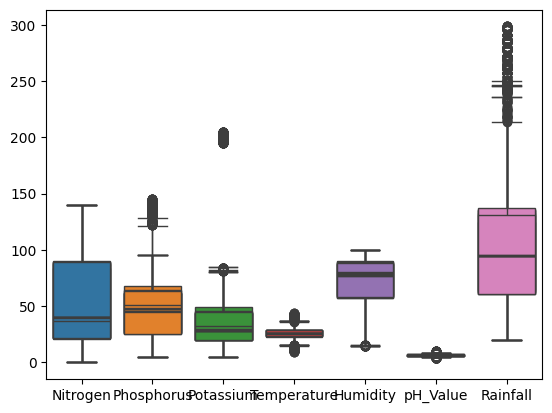

In [36]:
for column in df.iloc[:,0:7].columns:
  q1=df[column].quantile(0.25)
  q3=df[column].quantile(0.75)
  iqr=q3-q1
  ub=q3+1.5*iqr
  lb=q1-1.5*iqr
  df=df[(df[column] > lb) & (df[column] < ub)]
  sns.boxplot(data=df.iloc[:,0:7])


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1835 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     1835 non-null   int64  
 1   Phosphorus   1835 non-null   int64  
 2   Potassium    1835 non-null   int64  
 3   Temperature  1835 non-null   float64
 4   Humidity     1835 non-null   float64
 5   pH_Value     1835 non-null   float64
 6   Rainfall     1835 non-null   float64
 7   Crop         1835 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 129.0+ KB


In [38]:
df.isna().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
dtype: int64

In [39]:
df.describe()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
count,1835.000000,1835.000000,1835.000000,1835.000000,1835.000000,1835.000000,1835.000000
mean,54.332970,45.021253,32.441962,25.749130,70.103744,6.490981,101.696524
std,38.018129,22.496118,16.163029,4.132874,22.332607,0.679193,52.660831
min,0.000000,5.000000,5.000000,15.330426,14.258040,4.603563,20.211267
25%,22.000000,25.000000,20.000000,23.319911,58.357710,6.031637,60.935861
50%,40.000000,45.000000,28.000000,25.854836,77.524260,6.470135,94.467480
75%,89.000000,63.000000,44.500000,28.529712,88.403042,6.941378,131.228379
max,140.000000,95.000000,84.000000,36.750875,99.981876,8.380185,250.083234


In [40]:
label_encoder["Crop"]=LabelEncoder()
df["Crop"]=label_encoder["Crop"].fit_transform(df["Crop"])

In [41]:
df.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,18
1,85,58,41,21.770462,80.319644,7.038096,226.655537,18
3,74,35,40,26.491096,80.158363,6.980401,242.864034,18
7,94,53,40,20.277744,82.894086,5.718627,241.974195,18
8,89,54,38,24.515881,83.535216,6.685346,230.446236,18


# Feature Scaling

In [42]:
x=df.iloc[:,0:7]
cols=x.columns
scaler=StandardScaler().fit(x)
x=scaler.transform(x)
x=pd.DataFrame(x,columns=cols)
x.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
0,0.938414,-0.134338,0.653400,-1.178530,0.532954,0.017680,1.922997
1,0.806862,0.577090,0.529627,-0.962951,0.457568,0.805757,2.373549
2,0.517448,-0.445587,0.467740,0.179577,0.450344,0.720787,2.681424
3,1.043656,0.354769,0.467740,-1.324231,0.572877,-1.137473,2.664521
4,0.912104,0.399233,0.343967,-0.298481,0.601593,0.286249,2.445552


In [43]:
for column in x.columns:
  new=pd.Series(x[column].values,index=df[column]).to_dict()
  df[column]=df[column].map(new)

In [44]:
df.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,0.938414,-0.134338,0.653400,-1.178530,0.532954,0.017680,1.922997,18
1,0.806862,0.577090,0.529627,-0.962951,0.457568,0.805757,2.373549,18
3,0.517448,-0.445587,0.467740,0.179577,0.450344,0.720787,2.681424,18
7,1.043656,0.354769,0.467740,-1.324231,0.572877,-1.137473,2.664521,18
8,0.912104,0.399233,0.343967,-0.298481,0.601593,0.286249,2.445552,18


# Classification

In [45]:
value=df.iloc[:,0:7]
target=df.iloc[:,7:8]
nbmodel=GaussianNB()

In [46]:
x_train,x_test,y_train,y_test=train_test_split(value,target,test_size=0.3,random_state=0)

In [47]:
nbmodel.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



GaussianNB()

In [48]:
y_pred=nbmodel.predict(x_test)

#Predicting sample data

In [49]:
test_data=np.array([[90,42,43,20.87,82.00,6.50,202.9355],[20,100,41,61.54,81.21,4.2,9.655],[50,43,78,19.54,70.54,5.76,30.54]])
nbmodel.predict(test_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but GaussianNB was fitted with feature names



array([16, 16, 16])

#Evaluation metrics

In [50]:
print(accuracy_score(y_pred,y_test))

0.9891107078039928


In [51]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00        30
           6       0.96      0.85      0.90        26
           7       1.00      1.00      1.00        29
           8       1.00      0.97      0.98        31
           9       1.00      1.00      1.00        27
          10       1.00      1.00      1.00        34
          11       0.96      1.00      0.98        23
          12       1.00      1.00      1.00        38
          13       1.00      1.00      1.00        28
          14       1.00      1.00      1.00        27
          15       1.00      1.00      1.00        21
          16       1.00      1.00      1.00        23
          17       1.00    

<Axes: >

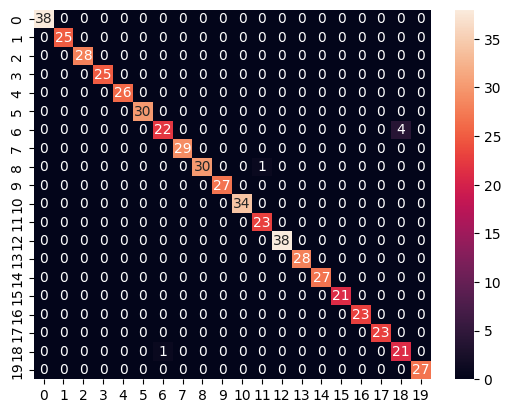

In [52]:
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True)

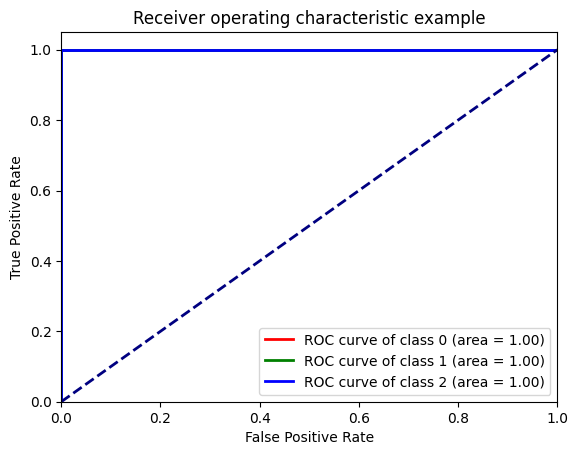

In [53]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

clf = OneVsRestClassifier(GaussianNB())
clf.fit(x_train, y_train)

y_score = clf.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
colors = ['red', 'green', 'blue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


#Interpretation
**The closer the ROC curve is to the upper left corner, the better the model is at distinguishing between classes.**

**A model with an AUC of 1.0 is a perfect classifier, while a model with an AUC of 0.5 is no better than random guessing.**

**In this case, the AUC of 1.00 indicates that the model is good at distinguishing between loan applicants who will and will not default on their loans.**


In [54]:
# prompt: generate a pca plot with interpretation for all the  independent variables

import pandas as pd
# Create a PCA instance
pca = PCA(n_components=2)

# Fit the PCA instance to the scaled features
pca.fit(x)

# Transform the scaled features using the fitted PCA instance
pca_data = pca.transform(x)

# Create a DataFrame with the principal components and labels
pca_df = pd.DataFrame({
    "pca_1": pca_data[:, 0],
    "pca_2": pca_data[:, 1],
    "label": df["Crop"]
})

# Create a plotly express scatter plot
fig = px.scatter(pca_df, x="pca_1", y="pca_2", color="label")

# Update the plot layout
fig.update_layout(
    title="PCA Plot",
    xaxis_title="PC1",
    yaxis_title="PC2"
)

# Show the plot
fig.show()

